In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
math = pd.read_csv('../data/math_reason.csv')
port = pd.read_csv('../data/port_reason.csv')

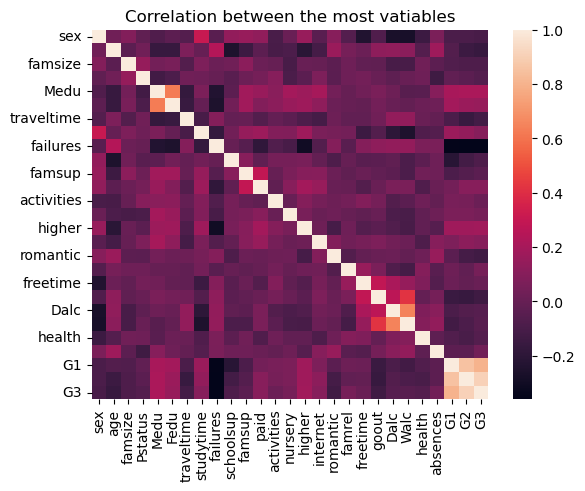

In [9]:
sns.heatmap(math.corr(numeric_only=True))
plt.title('Correlation between the most vatiables')
plt.show()

We can see correlation between mother's and father's education. The idea of people choosing pair with same edu may be incorrect. More realistic that people with higher education don't want to choose people with lower education.

Also there are some relationship between __Dalc__, __Walc__ and __goout__ columns. It is quite predictable.

In [11]:
math.columns

Index(['sex', 'age', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob',
       'reason', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup',
       'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
       'G1', 'G2', 'G3'],
      dtype='object')

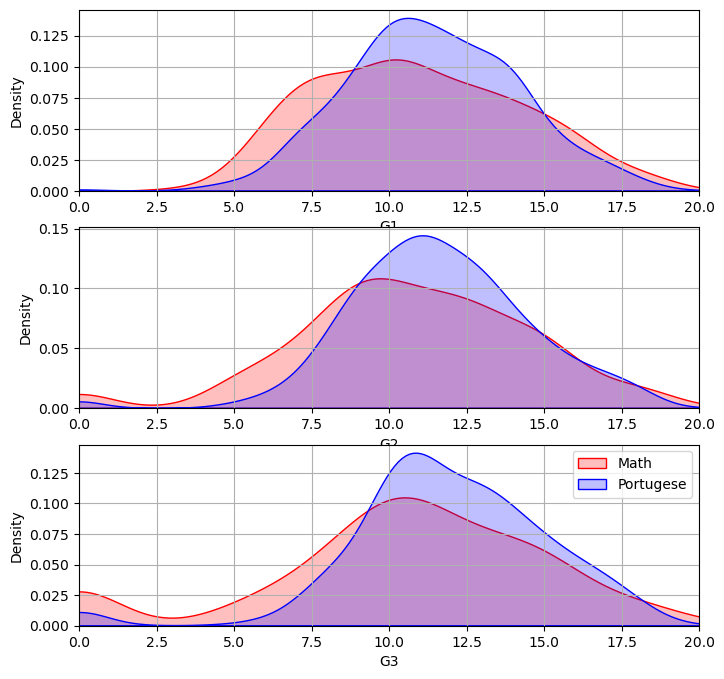

In [22]:
fig, axes = plt.subplots(3, 1, figsize=(8, 8))
for grade, ax in zip(['G1', 'G2', 'G3'], axes):
    sns.kdeplot(math[grade], fill=True, color='r', ax=ax, label='Math')
    sns.kdeplot(port[grade], fill=True, color='b', ax=ax, label='Portugese')
    ax.grid()
    ax.set_xlim(0, 20)
plt.legend()
plt.show()

Math is harder that Port, as we can see in the left side of each plot.

In [24]:
math[math['G1'] == 0]
# noone has 0 score in G1
math[math['G2'] == 0]

,sex,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,traveltime,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
130,1,15,1,1,3,4,services,teacher,course,2,...,4,2,2,2,2,5,0,12,0,0
131,1,15,1,1,1,1,at_home,other,course,3,...,4,3,3,1,2,4,0,8,0,0
134,0,15,1,1,3,4,at_home,teacher,course,4,...,5,3,3,1,1,5,0,9,0,0
135,1,15,1,1,4,4,services,at_home,course,1,...,4,3,3,1,1,5,0,11,0,0
136,0,17,1,1,3,4,at_home,other,course,3,...,5,4,5,2,4,5,0,10,0,0
137,1,16,1,0,3,3,other,other,course,2,...,4,3,2,1,1,5,0,4,0,0
144,0,17,1,1,2,1,other,other,home,1,...,5,4,5,1,2,5,0,5,0,0
153,0,19,1,1,3,2,services,at_home,home,1,...,4,5,4,1,1,4,0,5,0,0
162,0,16,0,1,1,2,other,other,course,2,...,4,4,4,2,4,5,0,7,0,0
242,0,16,0,1,4,3,teacher,other,course,1,...,5,4,5,1,1,3,0,6,0,0


In [25]:
math[math['G3'] == 0]

,sex,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,traveltime,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
128,0,18,1,1,2,2,services,other,reputation,1,...,3,3,3,1,2,4,0,7,4,0
130,1,15,1,1,3,4,services,teacher,course,2,...,4,2,2,2,2,5,0,12,0,0
131,1,15,1,1,1,1,at_home,other,course,3,...,4,3,3,1,2,4,0,8,0,0
134,0,15,1,1,3,4,at_home,teacher,course,4,...,5,3,3,1,1,5,0,9,0,0
135,1,15,1,1,4,4,services,at_home,course,1,...,4,3,3,1,1,5,0,11,0,0
136,0,17,1,1,3,4,at_home,other,course,3,...,5,4,5,2,4,5,0,10,0,0
137,1,16,1,0,3,3,other,other,course,2,...,4,3,2,1,1,5,0,4,0,0
140,0,15,1,1,4,3,teacher,services,course,2,...,2,2,2,1,1,3,0,7,9,0
144,0,17,1,1,2,1,other,other,home,1,...,5,4,5,1,2,5,0,5,0,0
146,1,15,1,1,3,2,health,services,home,1,...,3,3,2,1,1,3,0,6,7,0


In [27]:
math[(math['G2'] == 0) & (math['G3'] != 0)]
# if someone fail G2, they will also have 0 score in G3

,sex,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,traveltime,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


<Axes: >

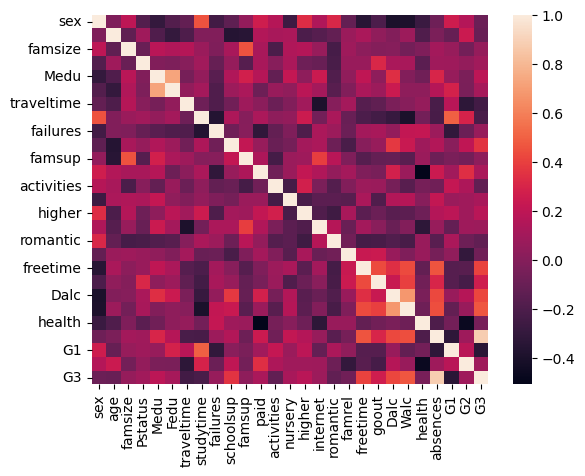

In [28]:
sns.heatmap(math[math['G3'] <= 5].corr(numeric_only=True))